# Interactive Clinical Gait Report  

example running CGM modelling operation from a configuration file (json) following by section (Gait Processing) dealing with differents Analysis we can perform from modelled c3d  



In [32]:
from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [33]:
%%HTML
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/bootswatch/4.0.0/cosmo/bootstrap.min.css" type="text/css"/>


In [34]:
# -*- coding: utf-8 -*-
import os
import matplotlib.pyplot as plt
import pandas as pd

# pyCGM2 settings
import pyCGM2

# pyCGM2 libraries
from pyCGM2.Tools import btkTools
from pyCGM2.Report import plot,plotFilters,plotViewers,normativeDatasets,annotator
from pyCGM2.Processing import c3dManager,exporter,scores
from pyCGM2.Processing.highLevel import gaitSmartFunctions
from pyCGM2.Utils import files
from pyCGM2.Processing import jointPatterns


from pyCGM2.apps.CGM_Pipeline import Pipeline,pipManager



In [35]:
ModellingConfig = """
PipelineVersion: pipe-V-1.1.0
DATA_PATH: C:/Users/HLS501/Documents/VICON DATA/pyCGM2-Data/Datasets Tests/didier/08_02_18_Vincent Pere/
OutDataPath: None
ModelVersion: CGM2.4
fileSuffix: cgm24
Subject:
  Id: PN01
ExperimentalContext:
  sessionName: S01
  AssessorName: O01

Modelling:
    pointSuffix: None
    ModelInfo: 
    MarkerDiameter: 14
    MP:
        Required:
            Bodymass: 70
            Height: 1700
            LeftLegLength: 890
            RightLegLength: 890
            LeftKneeWidth: 150
            RightKneeWidth: 150
            LeftAnkleWidth: 88
            RightAnkleWidth: 99
            LeftSoleDelta: 0
            RightSoleDelta: 0
        Optional:
            InterAsisDistance: 0
            LeftAsisTrocanterDistance: 0
            LeftTibialTorsion: 0
            LeftThighRotation: 0
            LeftShankRotation: 0
            RightAsisTrocanterDistance: 0
            RightTibialTorsion: 0
            RightThighRotation: 0
            RightShankRotation: 0
            LeftKneeFuncCalibrationOffset: 0
            RightKneeFuncCalibrationOffset: 0
    NoIK: 1
    Calibration:
        HJC:
            Left: []
            Right: []
        LeftFlatFoot: 1
        RightFlatFoot: 1
        Trial: 08_02_18_Vincent_Pere_Statique_000_MOKKA.c3d

    KneeCalibrationTrials:
        Left:
            Method: None
            Trial: None
            BeginFrame: 0
            EndFrame: 0
        Right:
            Method: None
            Trial: None
            BeginFrame: 0
            EndFrame: 0
    Fitting:
        IkweightFile: None
        Trials:
            - File: 08_02_18_Vincent_Pere_Gait_000_MOKKA.c3d
              Mfpa: XX

        Projection: JCS
      
"""


manager = pipManager.PipelineFileManager(None,None,stringContent = ModellingConfig)

DATA_PATH = manager.getDataPath() 

DATA_PATH_OUT = DATA_PATH if manager.getOutDataPath() is None else manager.getOutDataPath()
if manager.getOutDataPath() is not None:
    files.createDir(DATA_PATH_OUT)


[pyCGM2-INFO]-files-openPipelineFile : your config file agree yaml syntax


In [36]:

Pipeline.modelling(manager,DATA_PATH,DATA_PATH_OUT)

[pyCGM2-INFO]-Pipeline-modelling : model version : CGM2.4
[pyCGM2-INFO]-Pipeline-modelling : mp from pipeline file
[pyCGM2-WARNING]-cgmUtils-applyDecorators_CGM : CASE FOUND ===> Left Side = Knee and Ankle Medial
[pyCGM2-WARNING]-cgmUtils-applyDecorators_CGM : CASE FOUND ===> Right Side = Knee and Ankle Medial
[pyCGM2-INFO]-cgmUtils-applyHJCDecorators : [pyCGM2] Left HJC : Hara
[pyCGM2-INFO]-cgmUtils-applyHJCDecorators : [pyCGM2] Right HJC : Hara
[pyCGM2-INFO]-Pipeline-modelling : Static Calibration -----> Done
[pyCGM2-INFO]-cgm2_4-fitting : Force plate assignment : XX
[pyCGM2-WARNING]-cgm2_4-fitting : Manual Force plate assignment : XX
[pyCGM2-INFO]-Pipeline-modelling : Fitting -----> Done
[pyCGM2-INFO]-Pipeline-modelling : c3d file (08_02_18_Vincent_Pere_Gait_000_MOKKA-modelled-cgm24.c3d) generated


## Gait Processing 

### Aalysis 1 - Spontaeous Gait

In [37]:

modelledFiles = ["08_02_18_Vincent_Pere_Gait_000_MOKKA-modelled-cgm24.c3d"]
modelInfo = None
subjectInfo = None
experimentalInfo = None
modelVersion= manager.getModelVersion()
pointSuffix=manager.getPointSuffix()

# analysis constructor-------
c3dmanagerProcedure = c3dManager.UniqueC3dSetProcedure(DATA_PATH,modelledFiles)
cmf = c3dManager.C3dManagerFilter(c3dmanagerProcedure)
cmf.enableEmg(False)
trialManager = cmf.generate()

analysis = gaitSmartFunctions.make_analysis(trialManager,
      None,
      None,
      modelInfo, subjectInfo, experimentalInfo,
      modelVersion = "CGM2.4",
      pointLabelSuffix=pointSuffix)
# end analysis -------

normativeDataset = normativeDatasets.Schwartz2008("Free")



[pyCGM2-INFO]-analysis-computeSpatioTemporel : --stp computation--
[pyCGM2-INFO]-analysis-computeSpatioTemporel : left stp computation---> done
[pyCGM2-INFO]-analysis-computeSpatioTemporel : right stp computation---> done
[pyCGM2-INFO]-analysis-computeKinematics : --kinematic computation--
[pyCGM2-INFO]-analysis-computeKinematics : left kinematic computation---> done
[pyCGM2-INFO]-analysis-computeKinematics : right kinematic computation---> done
[pyCGM2-INFO]-analysis-computeKinetics : --kinetic computation--
[pyCGM2-WARNING]-analysis-computeKinetics : No Kinetic computation


In [38]:
# selection of the normative Dataset
normativeDataset = normativeDatasets.Schwartz2008("Free")

#### Spatio-temporal parameters

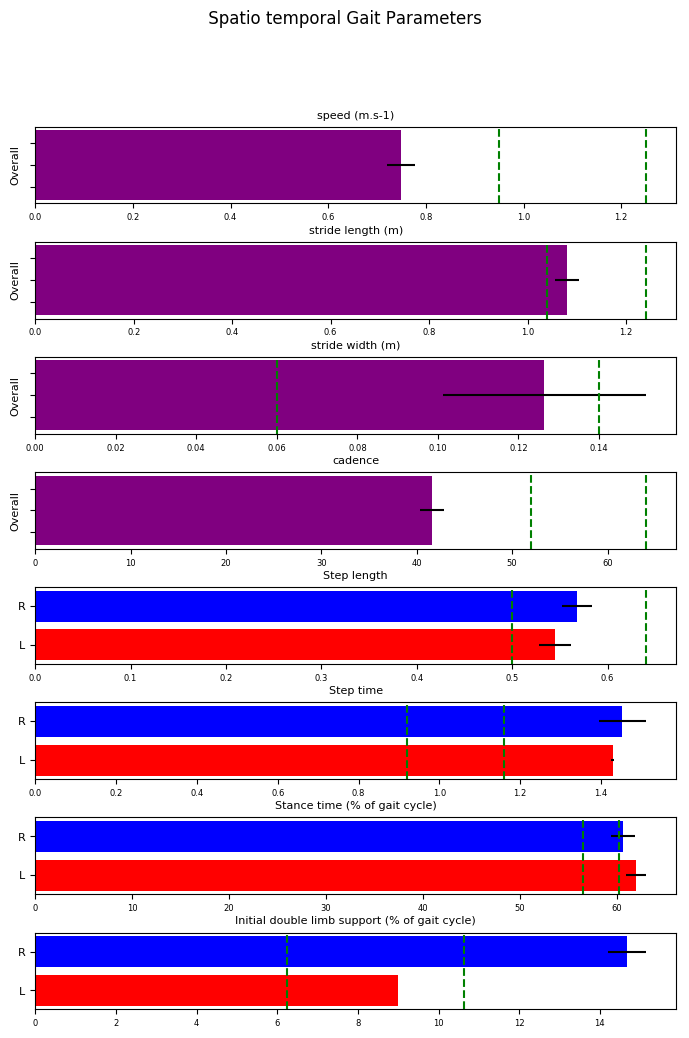

In [39]:
stpv = plotViewers.SpatioTemporalPlotViewer(analysis)
stpv.setNormativeDataset(normativeDatasets.NormalSTP())

# filter
stppf = plotFilters.PlottingFilter()
stppf.setViewer(stpv)
stppf.plot()

plt.show()

In [40]:
#### Movement Analysis Profile

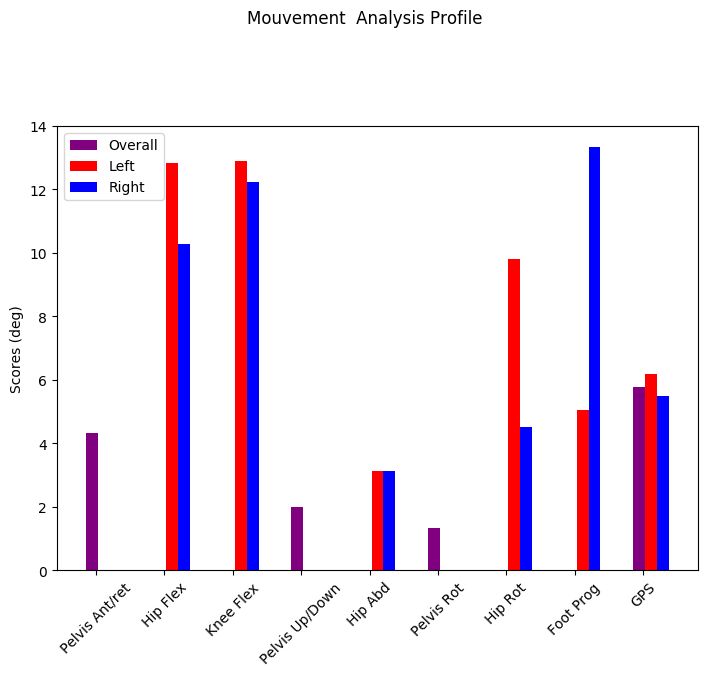

In [41]:
gps =scores.CGM1_GPS(pointSuffix= pointSuffix)
scf = scores.ScoreFilter(gps,analysis, normativeDataset)
scf.compute()


kv = plotViewers.GpsMapPlotViewer(analysis)
# filter
pf = plotFilters.PlottingFilter()
pf.setViewer(kv)
pf.plot()

plt.show()

#### Kinematic Trace

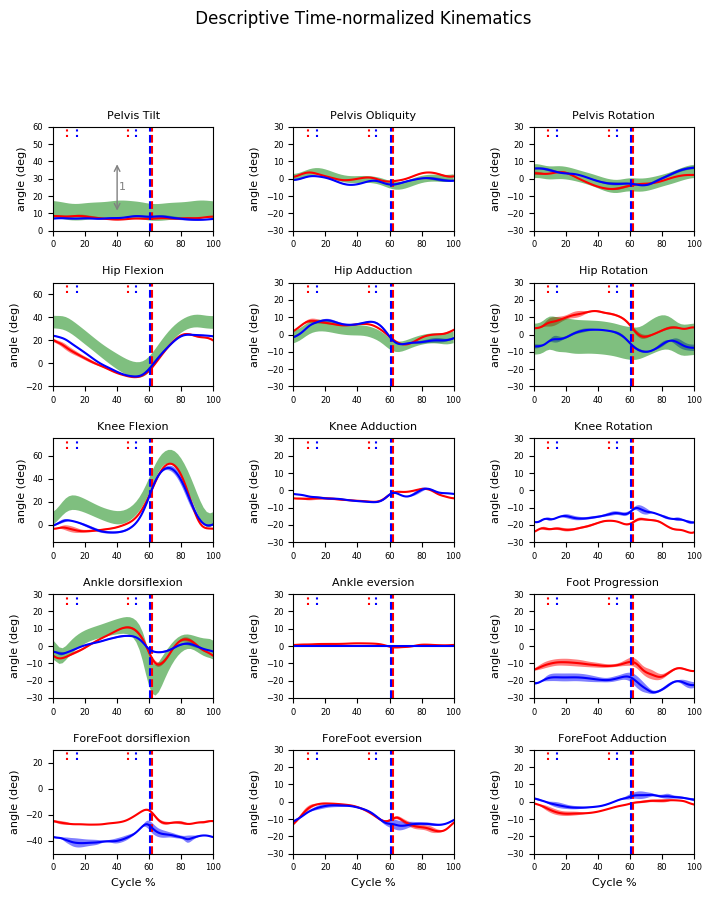

In [42]:
kv = plotViewers.LowerLimbMultiFootKinematicsPlotViewer(analysis,
                    pointLabelSuffix=pointSuffix)

kv.setConcretePlotFunction(plot.gaitDescriptivePlot)
kv.setNormativeDataset(normativeDataset)

# filter
pf = plotFilters.PlottingFilter()
pf.setViewer(kv)
pf.plot()

#plt.show()

ka = annotator.Annotator(pf.fig)
ka.IncreasedRange(0,40,10,40, "Context", timing="Throughout Cycle")
plt.show()


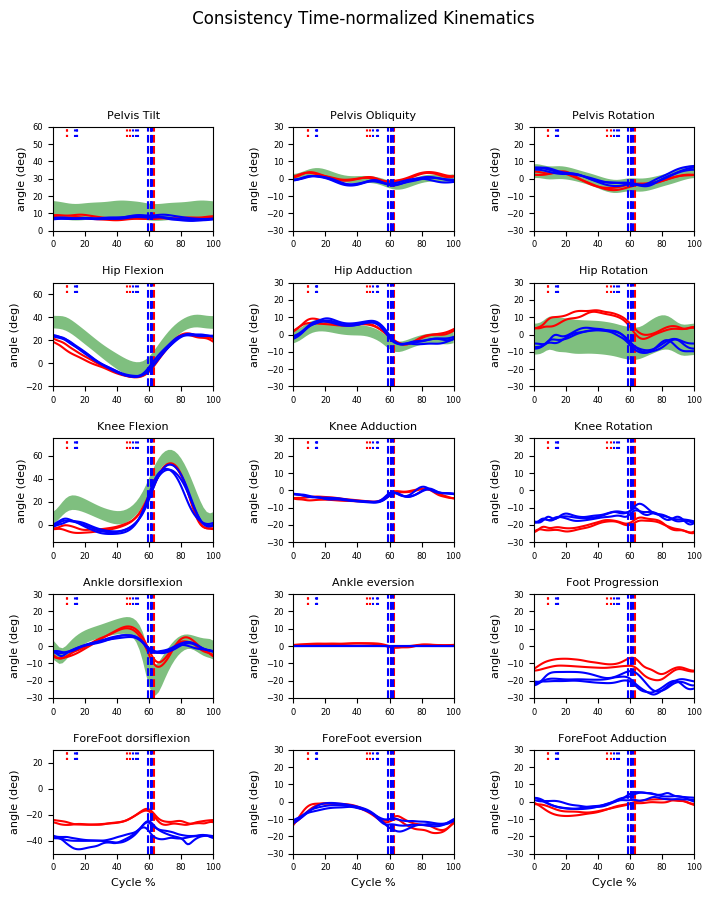

In [43]:
kv = plotViewers.LowerLimbMultiFootKinematicsPlotViewer(analysis,
                    pointLabelSuffix=pointSuffix)

kv.setConcretePlotFunction(plot.gaitConsistencyPlot)
kv.setNormativeDataset(normativeDataset)

# filter
pf = plotFilters.PlottingFilter()
pf.setViewer(kv)
pf.plot()

#pf.fig.axes[0].set_ylim([-20,10])

plt.show()

## Automatic Detection of gait Patterns


In [44]:
from pyCGM2.Processing import jointPatterns

#pd.set_option('max_colwidth', 4000)


RULES_PATH = pyCGM2.CONFIG.MAIN_PYCGM2_PATH +"Data\\jointPatterns\\"
rulesXls = RULES_PATH+"Nieuwenhuys2017.xlsx"

jpp = jointPatterns.XlsJointPatternProcedure(rulesXls)

dpf = jointPatterns.JointPatternFilter(jpp, analysis)
dataFrameValues = dpf.getValues()
dataFramePatterns = dpf.getPatterns(filter=True)
display(dataFramePatterns)
#xlsExport = exporter.XlsExportDataFrameFilter()
#xlsExport.setDataFrames([dataFrameValues])
#xlsExport.export("CGM2.3-TestsPointData", path=DATA_PATH_OUT)

#xlsExport = exporter.XlsExportDataFrameFilter()
#xlsExport.setDataFrames([dataFramePatterns])
#xlsExport.export("CGM2.3-TestsPatternsData", path=DATA_PATH_OUT)

,Context,Pattern
4,Left,Decreased pelvic tilt (posterior tilt) on average
12,Left,Knee hyperextension
13,Left,Knee hyperextension + increased knee flexion at initial contact
20,Left,Decreased peak knee flexion
28,Left,Insufficient prepositioning in terminal swing
35,Left,Normal hip motion
39,NaN,Normal pelvic posture/motion
43,Left,Normal hip motion
46,Left,Normal foot progression angle
63,Right,Decreased peak knee flexion
